In this homework, we'll be looking at the infamous Titanic dataset. It's become a canonical example for budding data scientists beginning machine learning and will be a good case study in using logistic regression.

From the project description on [Kaggle]('http://www.kaggle.com/c/titanic-gettingStarted'):
###Kaggle Competition | Titanic Machine Learning from Disaster

>The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew.  This sensational tragedy shocked the international community and led to better safety regulations for ships.

>One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew.  Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

>In this contest, we ask you to complete the analysis of what sorts of people were likely to survive.  In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

>This Kaggle Getting Started Competition provides an ideal starting place for people who may not have a lot of experience in data science and machine learning."

As with any start of a data science problem make sure you import your libraries!

In [28]:
%matplotlib inline

import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
#import additional libraries here if you need them
import pylab as pl
import seaborn as sns

Kaggle has conveniently split the data already into a training set and test set. You can find them in the data folder.

In [11]:
#load data here
ttrain = pd.read_csv("../data/titanic_training.csv")

While you could analyze this data many different ways, we'll focus on using logistic regression. For a recap of what logistic regression is look [here]('http://blog.yhathq.com/posts/logistic-regression-and-python.html').

Before creating your model, conduct some exploratory data analysis first. Make a few plots and comment on the results. What interesting patterns do you see?

In [14]:
#Code for plot goes here
ttrain.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [15]:
ttrain.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


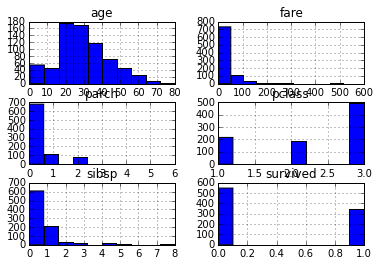

In [21]:
ttrain.hist()
pl.show()

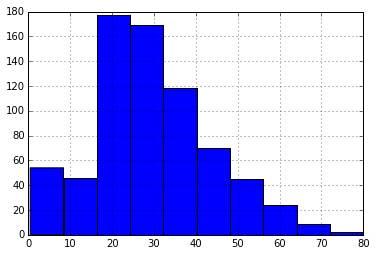

In [27]:
ttrain['age'].hist()

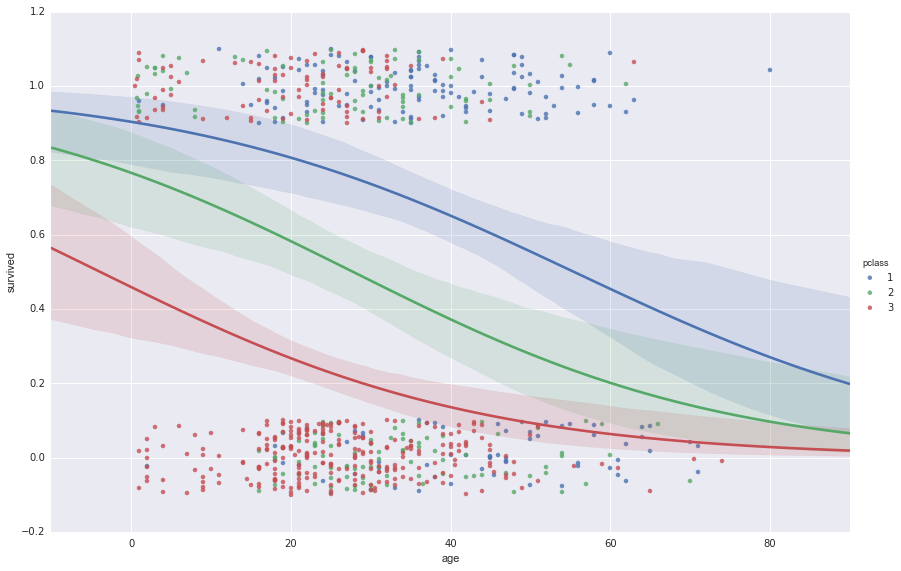

In [31]:
sns.lmplot("age", "survived", ttrain, hue="pclass", logistic=True, size=8, aspect=1.5, y_jitter=.1);

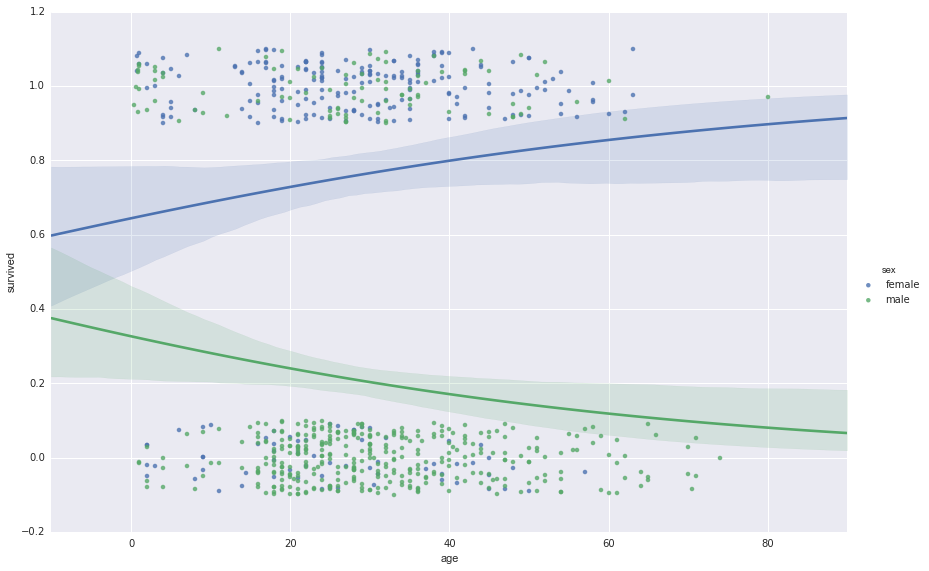

In [43]:
sns.lmplot("age", "survived", ttrain, hue="sex", logistic=True, size=8, aspect=1.5, y_jitter=.1);

Once you have explored the dataset, begin creating your model. You may want to do several iterations of this experimenting with different combinations of features. 

In [40]:
#Create your model here
model = smf.logit("survived ~ pclass + age + sex + fare + parch", data=ttrain).fit()

Optimization terminated successfully.
         Current function value: 0.451855
         Iterations 6


In [41]:
model.params

Intercept      5.045543
sex[T.male]   -2.583005
pclass        -1.239414
age           -0.037805
fare           0.001367
parch         -0.164923
dtype: float64

In [42]:
print model.summary()

                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                  714
Model:                          Logit   Df Residuals:                      708
Method:                           MLE   Df Model:                            5
Date:                Wed, 04 Mar 2015   Pseudo R-squ.:                  0.3310
Time:                        19:30:16   Log-Likelihood:                -322.62
converged:                       True   LL-Null:                       -482.26
                                        LLR p-value:                 7.196e-67
                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept       5.0455      0.578      8.731      0.000         3.913     6.178
sex[T.male]    -2.5830      0.214    -12.047      0.000        -3.003    -2.163
pclass         -1.2394      0.160     -7.724    

#How do I test my results?
There are a few ways to evaluate your model. One is by comparing it to the test set and calculating a prediction accuracy. This method would work if you have the outcome variable in your test set. Unfortunately for this dataset, Kaggle has withheld that, probably to prevent overfitting. You could also interpret it further by delving deeper into the summary information the model provides. This could involve looking at confidence intervals and odd ratios for the coefficients. 

In [44]:
#Evaluate results here
ttest = pd.read_csv("../data/titanic_test.csv")

In [45]:
ttest.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [47]:
predicted = model.predict(ttest)

In [50]:
#predicted<0.5

In [69]:
testData=ttest[["pclass","age","sex","fare","parch"]].values

print(testData.shape)
testData[:5,:]

(418, 5)


array([[3, 34.5, 'male', 7.8292, 0],
       [3, 47.0, 'female', 7.0, 0],
       [2, 62.0, 'male', 9.6875, 0],
       [3, 27.0, 'male', 8.6625, 0],
       [3, 22.0, 'female', 12.2875, 1]], dtype=object)

In [77]:
Tried cross-validation... does not work
#from sklearn.cross_validation import cross_val_score

#logit = smf.Logit(ttrain["survived"], ttrain["fare"])
#scores = cross_val_score(logit, ttrain["fare"],ttrain["survived"], cv=5)
#print scores

(Optional) Another way that you can evaluate, leveraging the fact that this is a Kaggle competition, is to upload your results directly to Kaggle and see how your results stack against all the others who have competed. To submit to Kaggle, you'll have to save the output of your predictions to a CSV file and upload that to the Kaggle Titanic contest page. You'll need a Kaggle account to do this. 

Go to the Kaggle page [here]('http://www.kaggle.com/c/titanic-gettingStarted').

If you do submit on Kaggle, post your Kaggle accuracy on Hipchat and see how you compare to your classmates!

*Note that the format for submission for Kaggle competitions is very strict. Make sure you submit it the way they want it.*

#Notes:
- There is missing data that you may want to remove before you begin running your analysis.
- Beware of overfitting! Sometimes a good prediction accuracy with the test set may not necessarily translate to the best result you would get on Kaggle.
